In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('lab_6_data.csv')
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [3]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [4]:
for col in df.columns:
    print(col,' : ' , df[col].dtype)

id  :  int64
diagnosis  :  object
radius_mean  :  float64
texture_mean  :  float64
perimeter_mean  :  float64
area_mean  :  float64
smoothness_mean  :  float64
compactness_mean  :  float64
concavity_mean  :  float64
concave points_mean  :  float64
symmetry_mean  :  float64
fractal_dimension_mean  :  float64
radius_se  :  float64
texture_se  :  float64
perimeter_se  :  float64
area_se  :  float64
smoothness_se  :  float64
compactness_se  :  float64
concavity_se  :  float64
concave points_se  :  float64
symmetry_se  :  float64
fractal_dimension_se  :  float64
radius_worst  :  float64
texture_worst  :  float64
perimeter_worst  :  float64
area_worst  :  float64
smoothness_worst  :  float64
compactness_worst  :  float64
concavity_worst  :  float64
concave points_worst  :  float64
symmetry_worst  :  float64
fractal_dimension_worst  :  float64
Unnamed: 32  :  float64


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.drop("id", axis=1, inplace=True)
df.drop("diagnosis", axis=1, inplace=True)
df.drop("Unnamed: 32", axis =1, inplace=True)

In [8]:
def zscore_normalize(data):

    mean = sum(data) / len(data)
    variance = sum([(x - mean) ** 2 for x in data]) / len(data)
    std_dev = variance ** 0.5
    normalized_data = []
    for x in data:
        normalized_x = (x - mean) / std_dev
        normalized_data.append(normalized_x)
    return normalized_data
for cols in df:
    df[cols] = zscore_normalize(df[cols])

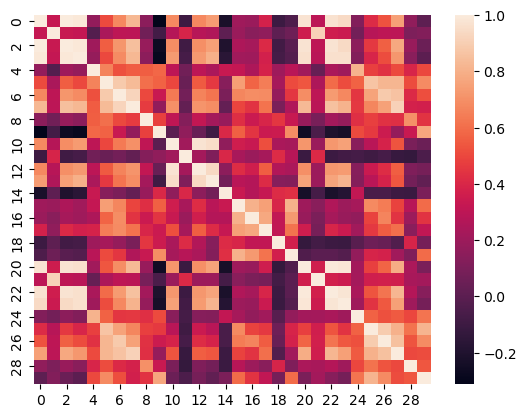

In [10]:
def covariance_matrix(df):
  z = df.to_numpy()
  z_t = z.transpose()
  cov_mat = np.matmul(z_t, z)
  cov_mat = cov_mat / (len(df) - 1)
  return cov_mat

cov_mat = covariance_matrix(df)
sns.heatmap(cov_mat)
plt.show()

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [12]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

print(eigenvalues)
print(eigenvectors)

[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]
[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -4.96986642e-02
   6.85700057e-02 -7.29289034e-02  9.85526942e-02 -1.82579441e-01
   1.92264989e-02  1.29476396e-01 -1.31526670e-01 -2.11194013e-01
   2.11460455e-01 -7.02414091e-01]
 [ 1.03724578e-01 -5.97060883e-02  6.4549903

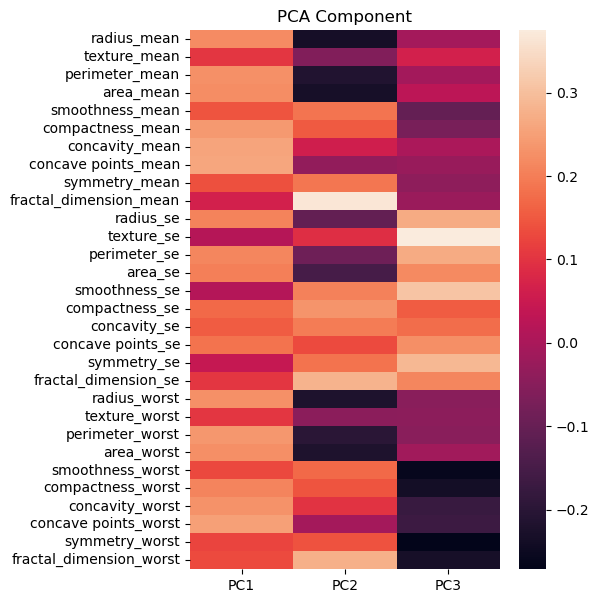

In [13]:
u = eigenvectors[:,:3]
pca_component = pd.DataFrame(u,
                             index = df.columns,
                             columns = ['PC1','PC2', 'PC3']
                            )

plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [14]:
pc1_eigenvector = eigenvectors[:, 0]
pc2_eigenvector = eigenvectors[:, 1]
pc3_eigenvector = eigenvectors[:, 2]

projected_data_pc1 = df.dot(pc1_eigenvector)
projected_data_pc2 = df.dot(pc2_eigenvector)
projected_data_pc3 = df.dot(pc3_eigenvector)

projected_data = pd.DataFrame({
    'PC1_Projection': projected_data_pc1,
    'PC2_Projection': projected_data_pc2,
    'PC3_Projection': projected_data_pc3
})

print(projected_data)


     PC1_Projection  PC2_Projection  PC3_Projection
0          9.192837        1.948583       -1.123166
1          2.387802       -3.768172       -0.529293
2          5.733896       -1.075174       -0.551748
3          7.122953       10.275589       -3.232790
4          3.935302       -1.948072        1.389767
..              ...             ...             ...
564        6.439315       -3.576817        2.459487
565        3.793382       -3.584048        2.088476
566        1.256179       -1.902297        0.562731
567       10.374794        1.672010       -1.877029
568       -5.475243       -0.670637        1.490443

[569 rows x 3 columns]
